In [1]:
import numpy as np
import numpy.random as npr
from scipy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

In [2]:
# Define the function of the dataset generation
def dataset(N):
    d1 = npr.normal(0, 1, N)
    d2 = np.add(d1, npr.normal(0,3, N))
    d3 = np.add(2*d1, d2)
    return np.column_stack((d1, d2, d3))

#Generate the dataset
N = 1500
X = dataset(N)

In [3]:
#Covariance matrix
cov_m = np.cov(X.T)

# Eigenvalues and eigenvectors
l, V = la.eig(cov_m)
l = np.real_if_close(l)

# Eigenvalues and eigenvectors using SVD
U, spectrum, Vt = la.svd(cov_m)
l_svd = spectrum
V_svd = U

print(np.allclose(np.sort(l), np.sort(l_svd)), np.allclose(np.sort(V), np.sort(V_svd)))

True True


In [4]:
# Sort the eigenvalues in descending order
idx = np.argsort(l)[::-1]
l_sort = l[idx]
V_sort = U.T[idx]

print('Principal components explain', np.round(np.real_if_close(l_sort.sum()/cov_m.trace())*100, 2), '% of the dataset.')

# We want 99%:
S, i = 0, 0
tr = cov_m.trace()
while np.real_if_close(S/tr) < 0.99:
    S += l_sort[i]
    i += 1
print("Lets reduce the number of PC and see the accuracy:")
print(np.round(np.real_if_close(S/tr)*100, 2), '%, number of PC = ', i)
print(np.round(np.real_if_close(l_sort[0]/tr)*100, 2), '%, number of PC = ', 1)

Principal components explain 100.0 % of the dataset.
Lets reduce the number of PC and see the accuracy:
100.0 %, number of PC =  2
93.45 %, number of PC =  1


In [5]:
# Redefinition of the data based on the PCA results
# rotate all the data points accordingly to the new base
Xp = np.dot(V_sort, X.T)

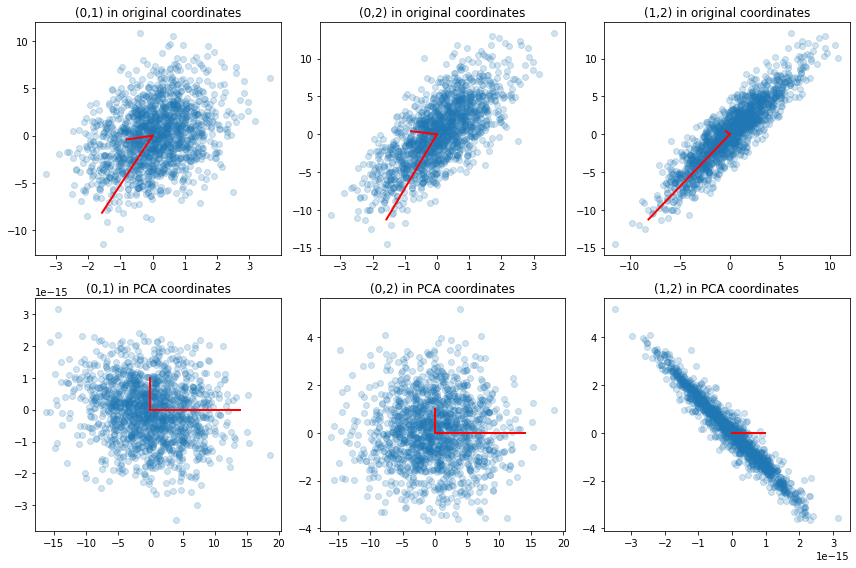

In [6]:
# Plot the data
fig, axs = plt.subplots(2,3, figsize=(12,8))
scale_factor = 0.5

axs[0,0].scatter(X.T[0,:], X.T[1,:], alpha=0.2)
for li, Vi in zip(l_sort, V_sort):
    axs[0, 0].plot([0, scale_factor*li*Vi[0]], [0, scale_factor*li*Vi[1]], 'r-', lw=2)
axs[0,0].set_title('(0,1) in original coordinates')

axs[0,1].scatter(X.T[0,:], X.T[2,:], alpha=0.2)
for li, Vi in zip(l_sort, V_sort):
    axs[0, 1].plot([0, scale_factor*li*Vi[0]], [0, scale_factor*li*Vi[2]], 'r-', lw=2)
axs[0,1].set_title('(0,2) in original coordinates')

axs[0,2].scatter(X.T[1,:], X.T[2,:], alpha=0.2)
for li, Vi in zip(l_sort, V_sort):
    axs[0, 2].plot([0, scale_factor*li*Vi[1]], [0, scale_factor*li*Vi[2]], 'r-', lw=2)
axs[0,2].set_title('(1,2) in original coordinates')

axs[1,0].scatter(Xp[0,:], Xp[1,:], alpha=0.2)
for li, Vi in zip(l_sort, np.diag([1]*3)):
    axs[1, 0].plot([0, scale_factor*li*Vi[0]], [0, scale_factor*li*Vi[1]*10**(-15)], 'r-', lw=2) #factor added to see the plot properly, but PCA much more important
axs[1,0].set_title('(0,1) in PCA coordinates')

axs[1,1].scatter(Xp[0,:], Xp[2,:], alpha=0.2)
for li, Vi in zip(l_sort, np.diag([1]*3)):
    axs[1, 1].plot([0, scale_factor*li*Vi[0]], [0, scale_factor*li*Vi[1]], 'r-', lw=2)
axs[1,1].set_title('(0,2) in PCA coordinates')

axs[1,2].scatter(Xp[1,:], Xp[2,:], alpha=0.2)
for li, Vi in zip(l_sort, np.diag([1]*3)):
    axs[1, 2].plot([0, scale_factor*li*Vi[1]*10**(-15)], [0, scale_factor*li*Vi[2]], 'r-', lw=2)#factor added to see the plot properly, but PCA much more important
axs[1,2].set_title('(1,2) in PCA coordinates')

fig.tight_layout()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [7]:
X = dataset(N)
for i in range(10):
    new_variable = np.random.normal(np.random.randint(0,5), np.random.randint(0,5)/50, N)
    X = np.column_stack((X, new_variable.T))
    
#Covariance matrix
cov_mnew = np.cov(X.T)

# Eigenvalues and eigenvectors
l_new, V_new = la.eig(cov_mnew)
l_new = np.real_if_close(l_new)

# Sort the eigenvalues in descending order
idx = np.argsort(l_new)[::-1]
l_sort2 = l_new[idx]
V_sort2 = V_new.T[idx]

# Lets find out the accuracy different PCs give:
S, n = 0, 0
tr = cov_mnew.trace()
print("Lets reduce the number of PC and see the accuracy:")
for i in l_sort2:
    S += i
    n += 1
    print(np.round(np.real_if_close(S/tr)*100, 2), '%, number of PC = ', n)


Lets reduce the number of PC and see the accuracy:
93.28 %, number of PC =  1
99.94 %, number of PC =  2
99.96 %, number of PC =  3
99.98 %, number of PC =  4
99.98 %, number of PC =  5
99.99 %, number of PC =  6
99.99 %, number of PC =  7
100.0 %, number of PC =  8
100.0 %, number of PC =  9
100.0 %, number of PC =  10
100.0 %, number of PC =  11
100.0 %, number of PC =  12
100.0 %, number of PC =  13


**Comment:** We can see by looking at these results that with the first principal component, we achieve 92,8% of accuracy, which is very high. Even higher accuracy we achieve with only 2 PCs (99.93%). Therefore, it would be very easy to reduce the dimensions of this dataset without loosing a lot of information. This makes sense because we added noise by building variables with little std compared with the first ones.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 